In [1]:
# Importando Bibliotecas
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Carregando o banco de dados
dados = pd.read_csv('heart.csv')

In [3]:
# Observando
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
# Observando o shape
dados.shape

(918, 12)

In [5]:
# Obtendo algumas informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Verificando se há valores nulos
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Total de valores únicos de cada variável
valores_unicos = [] # Criando uma lista vazia
for i in dados.columns[0:12].tolist(): # Loop por todas as colunas
    print(i, ':', len(dados[i].astype(str).value_counts())) # Contando os valores da coluna
    valores_unicos.append(len(dados[i].astype(str).value_counts())) # Adicionando os valores na lista vazia

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


In [8]:
# Verificando informações estatísticas
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [9]:
# Quantidade de observações por Sexo
dados.groupby(['Sex']).size()

Sex
F    193
M    725
dtype: int64

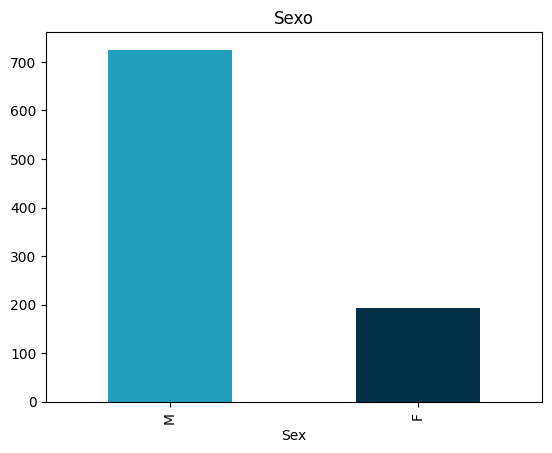

In [10]:
# Visualizando graficamente
dados.Sex.value_counts().plot(kind='bar', title='Sexo',color = ['#219ebc', '#023047']);

In [11]:
# Quantidade de observações por Tipo de Dor Toraxica
dados.groupby(['ChestPainType']).size()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64

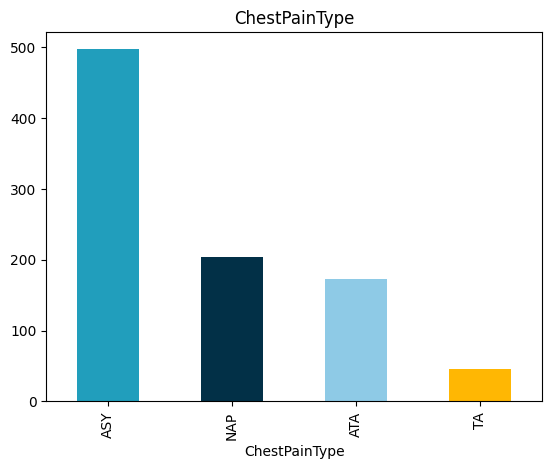

In [12]:
# Visualizando graficamente
dados.ChestPainType.value_counts().plot(kind='bar', title='ChestPainType',color = ['#219ebc', '#023047', '#8ecae6', '#ffb703']);

In [13]:
# Quantidade de observações por Glicemia em Jejum
dados.groupby(['FastingBS']).size()

FastingBS
0    704
1    214
dtype: int64

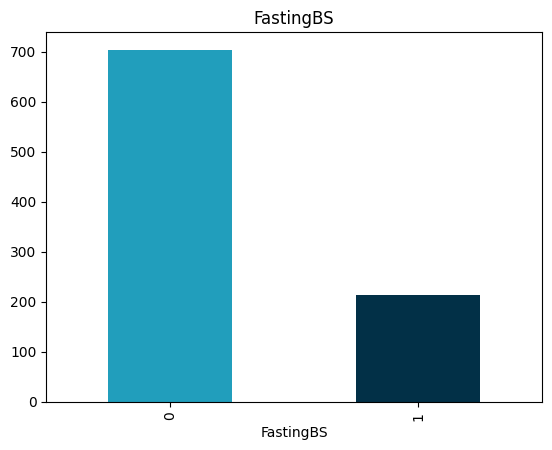

In [14]:
# Visualizando graficamente
dados.FastingBS.value_counts().plot(kind='bar', title='FastingBS',color = ['#219ebc', '#023047']);

In [15]:
# Quantidade de observações por Tipo de Dor Toraxica
dados.groupby(['RestingECG']).size()

RestingECG
LVH       188
Normal    552
ST        178
dtype: int64

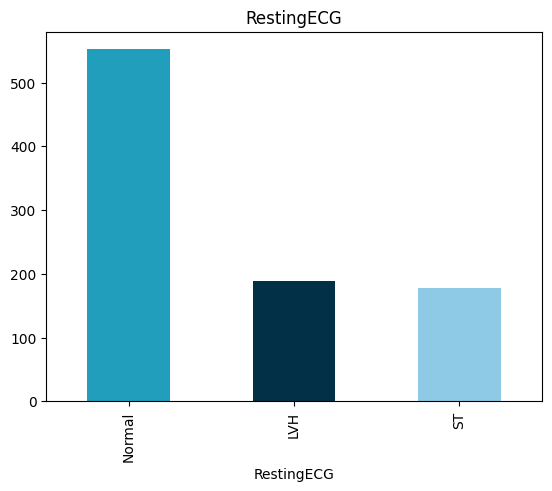

In [16]:
# Visualizando graficamente
dados.RestingECG.value_counts().plot(kind='bar', title='RestingECG',color = ['#219ebc', '#023047', '#8ecae6']);

In [17]:
# Quantidade de observações por Angina Induzida
dados.groupby(['ExerciseAngina']).size()

ExerciseAngina
N    547
Y    371
dtype: int64

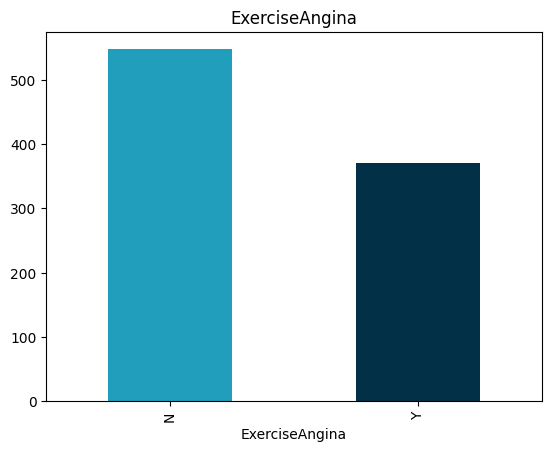

In [18]:
# Visualizando graficamente
dados.ExerciseAngina.value_counts().plot(kind='bar', title='ExerciseAngina',color = ['#219ebc', '#023047']);

In [19]:
# Quantidade de observações Inclinação Pico Exercicio
dados.groupby(['ST_Slope']).size()

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64

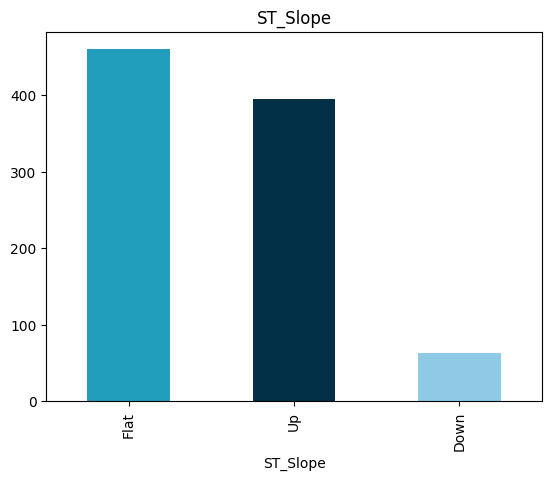

In [20]:
# Visualizando graficamente
dados.ST_Slope.value_counts().plot(kind='bar', title='ST_Slope',color = ['#219ebc', '#023047', '#8ecae6']);

In [21]:
# Quantidade de observações Doença Cardiaca (Variavel TARGET)
dados.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

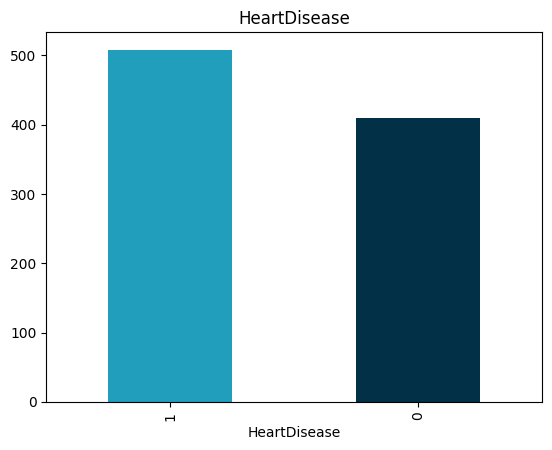

In [22]:
# Visualizando graficamente
dados.HeartDisease.value_counts().plot(kind='bar', title='HeartDisease',color = ['#219ebc', '#023047']);

In [23]:
# Formatando o tamanho do plot
plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True

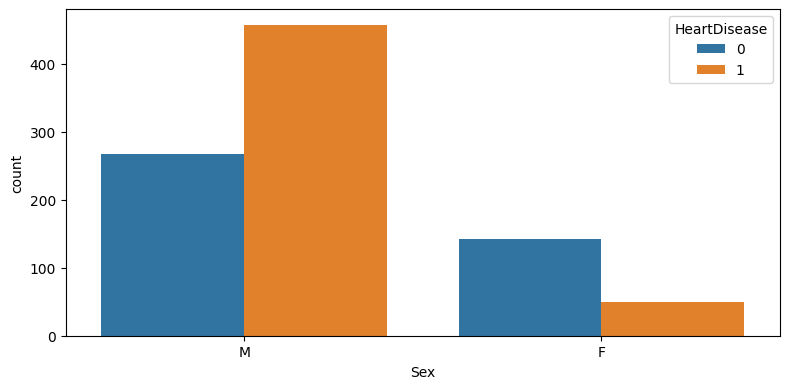

In [24]:
# Visualizando a Variável Sex x HeartDisease
sns.countplot(data = dados, x = "Sex", hue = "HeartDisease")
plt.show()

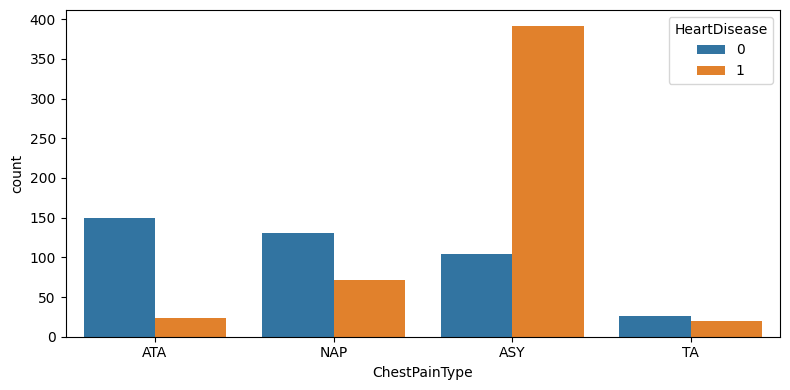

In [25]:
# Visualizando a Variável ChestPainType x HeartDisease
sns.countplot(data = dados, x = "ChestPainType", hue = "HeartDisease")
plt.show()

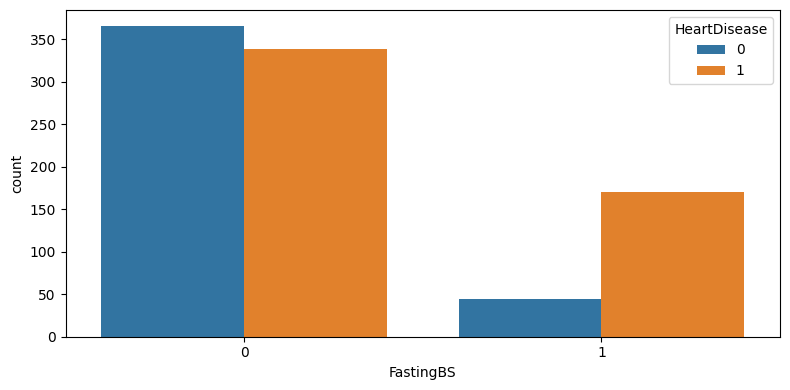

In [26]:
# Visualizando a Variável FastingBS x HeartDisease
sns.countplot(data = dados, x = "FastingBS", hue = "HeartDisease")
plt.show()

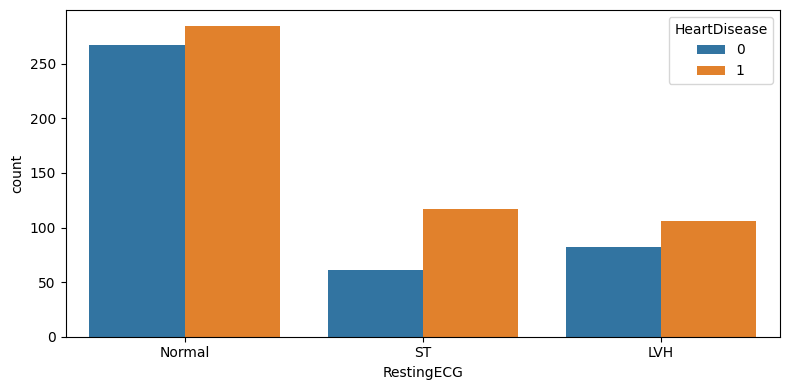

In [27]:
# Visualizando a Variável RestingECG x HeartDisease
sns.countplot(data = dados, x = "RestingECG", hue = "HeartDisease")
plt.show()

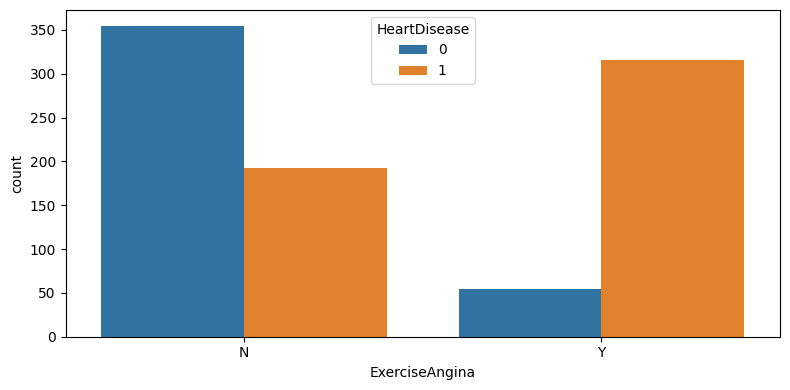

In [28]:
# Visualizando a Variável ExerciseAngina x HeartDisease
sns.countplot(data = dados, x = "ExerciseAngina", hue = "HeartDisease")
plt.show()

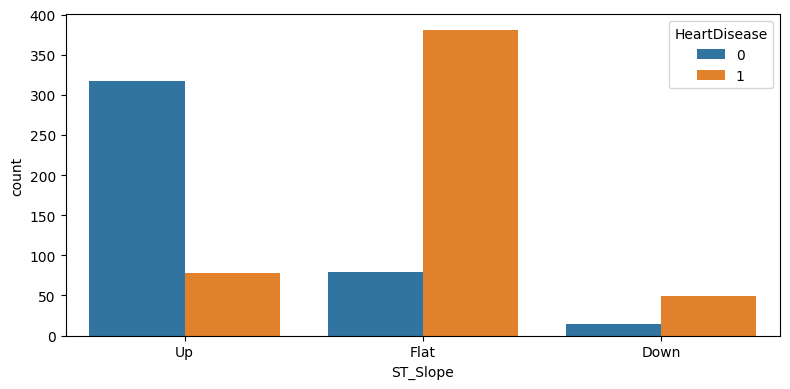

In [29]:
# Visualizando a Variável ST_Slope x HeartDisease
sns.countplot(data = dados, x = "ST_Slope", hue = "HeartDisease")
plt.show()

In [30]:
# Convertendo as variaveis do tipo Object para Category
dados['Sex'] = dados['Sex'].astype('category')
dados['ChestPainType'] = dados['ChestPainType'].astype('category')
dados['RestingECG'] = dados['RestingECG'].astype('category')
dados['ExerciseAngina'] = dados['ExerciseAngina'].astype('category')
dados['ST_Slope'] = dados['ST_Slope'].astype('category')
dados['FastingBS'] = dados['FastingBS'].astype('category')

In [31]:
# Conferindo a conversão
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 49.4 KB


In [32]:
# Carregando variaveis para plot
variaveis_numericas = []
for i in dados.columns[0:11].tolist(): # Loop por todo a dataframe, menos pela variável alvo
        if dados.dtypes[i] == 'int64' or dados.dtypes[i] == 'float64': # se a coluna for igual a int64 ou float64 é numérica
            variaveis_numericas.append(i) # Sendo numérica adiciona na lista

In [33]:
# Observando a lista variaveis_numericas
variaveis_numericas

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [34]:
# Observando a quantidade de valores
len(variaveis_numericas)

5

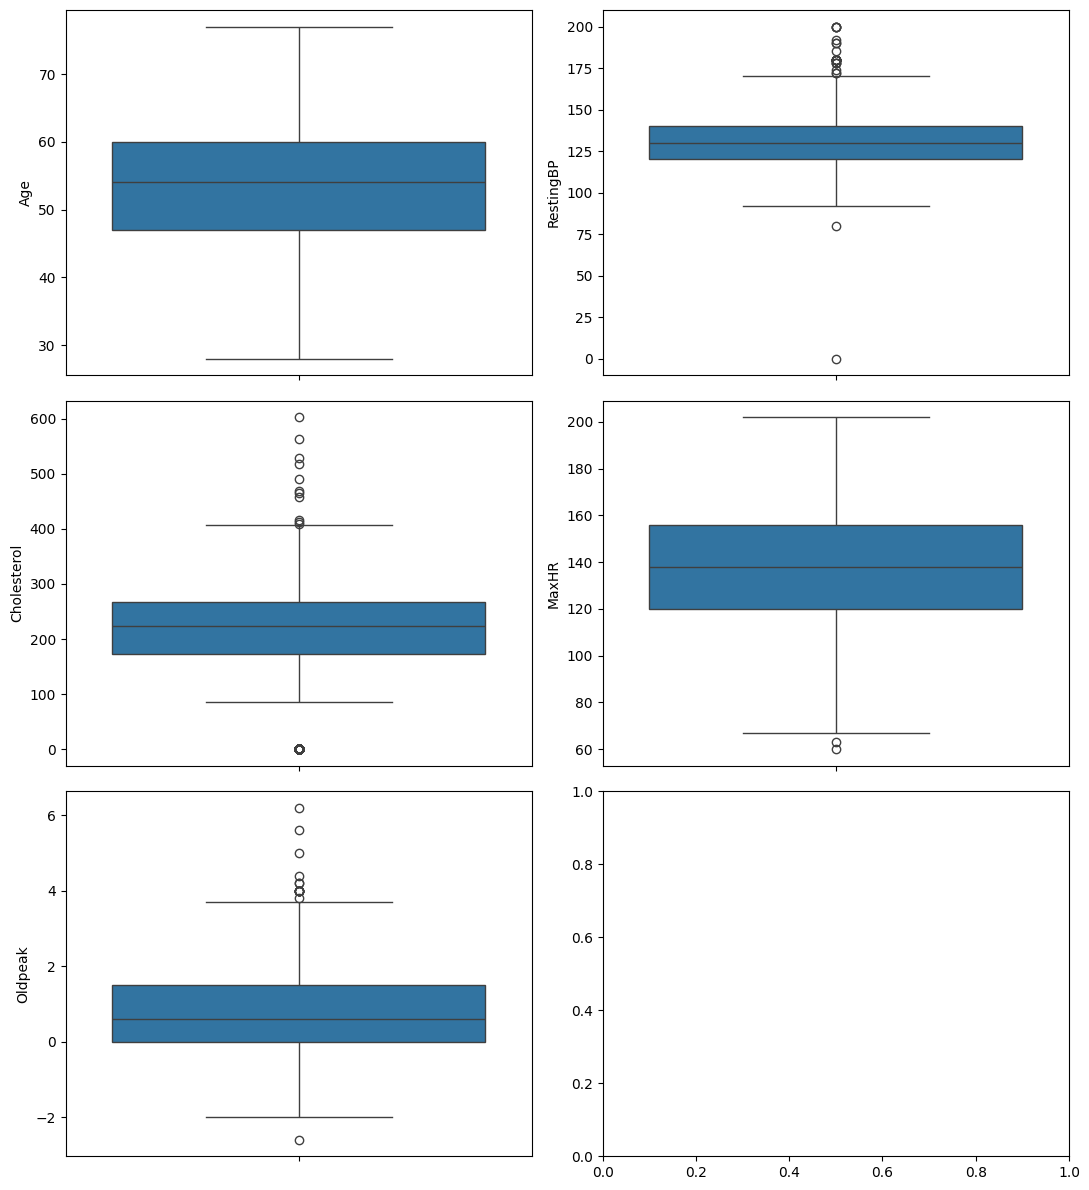

In [35]:
# Criando boxplot para encontrar possíveis outliers
plt.rcParams["figure.figsize"] = [11.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0 # Criando variável linha iniciando em 0
coluna = 0 # Criando variável coluna iniciando em 0
for i in variaveis_numericas: # Loop para ler toda a lista variaveis_numericas
    sns.boxplot(data = dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

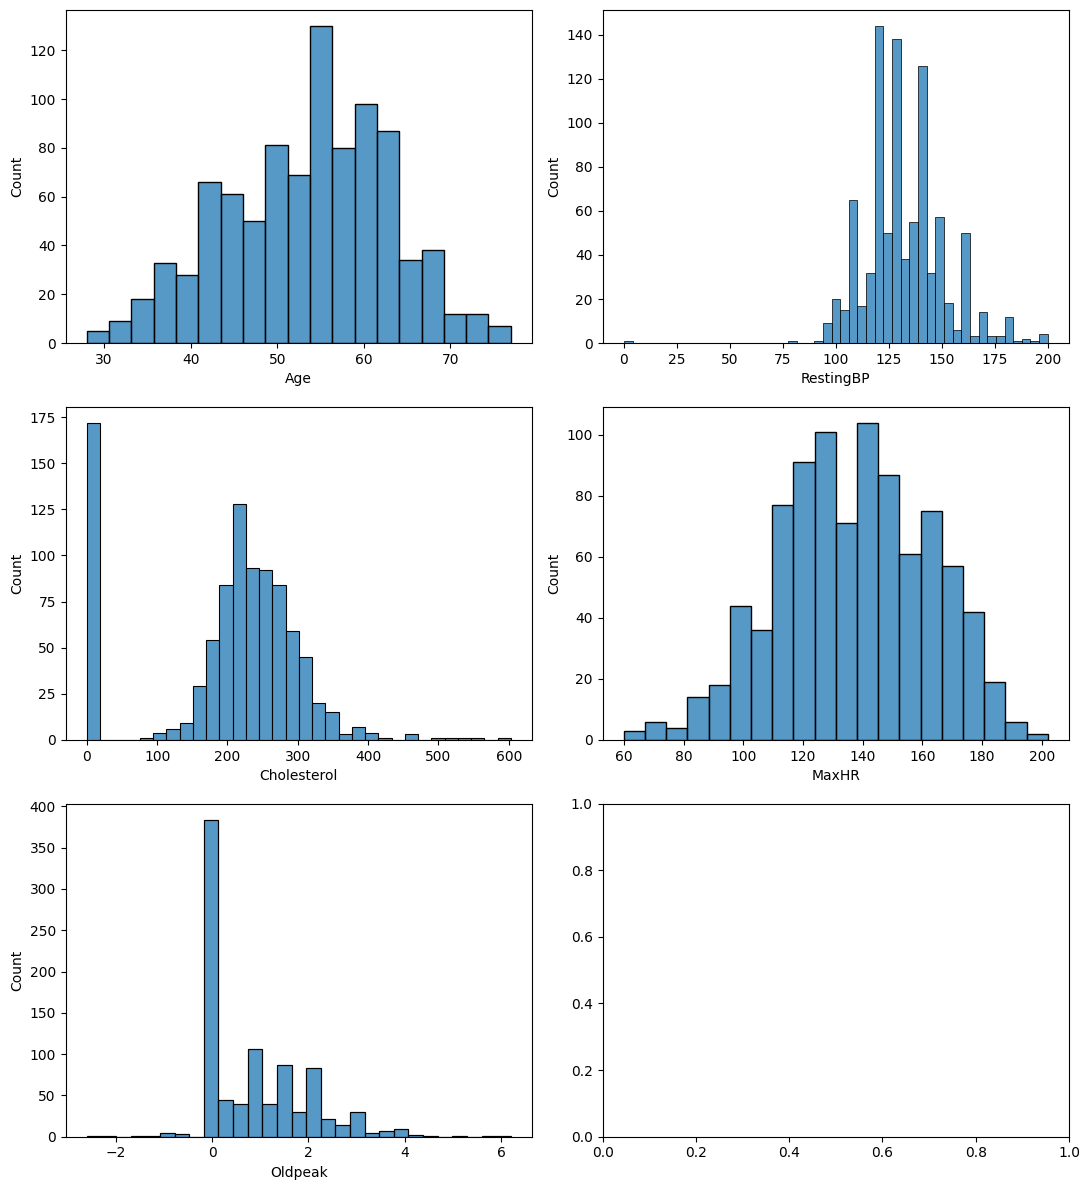

In [36]:
# Distribuição normal
plt.rcParams["figure.figsize"] = [11.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = dados, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

In [37]:
# Carregando variaveis categoricas para OneHotEncoding
variaveis_categoricas = []
for i in dados.columns[0:11].tolist():
        if dados.dtypes[i] == 'object' or dados.dtypes[i] == 'category':
            variaveis_categoricas.append(i)

In [38]:
# Visualizando as variaveis categoricas
variaveis_categoricas

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [39]:
# Criando o encoder e aplicando OneHotEncoder
lb = LabelEncoder()
for var in variaveis_categoricas: # Loop na lista de variáveis actegóricas
    dados[var] = lb.fit_transform(dados[var]) # Convertendo para numérico

In [40]:
# Verificando novamente para confirmar se após transformação surgiu algum valor nulo
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [41]:
# Confirmando a transformação das variaveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [42]:
# Observando
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


In [43]:
# Visualizanado a quantidade da variavel target para balanceamento
variavel_target = dados.HeartDisease.value_counts()
variavel_target

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [44]:
# Separando as variaveis preditoras e target
preditoras = dados.iloc[:, 0:11]
target = dados.iloc[:, 11]

In [45]:
# Visualizando as variaveis preditoras
preditoras.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.00,2
1,49,0,2,160,180,0,1,156,0,1.00,1
2,37,1,1,130,283,0,2,98,0,0.00,2
3,48,0,0,138,214,0,1,108,1,1.50,1
4,54,1,2,150,195,0,1,122,0,0.00,2


In [46]:
# Visualizando a variavel target
target.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [47]:
# Criando o balanceador SMOTE
balanceador = SMOTE()


In [48]:
# Aplicando o balanceador
preditoras_res, target_res = balanceador.fit_resample(preditoras, target)

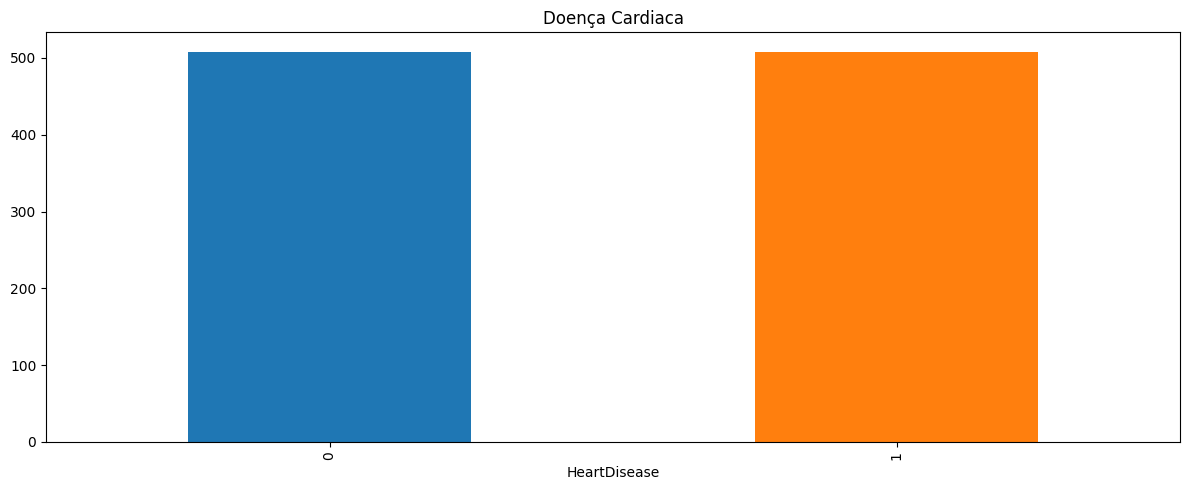

In [49]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
target_res.value_counts().plot(kind='bar', title='Doença Cardiaca',color = ['#1F77B4', '#FF7F0E']);

In [50]:
# Visualiznado a quantidade da variavel target depois do balanceamento
variavel_target = target_res.value_counts()
variavel_target

HeartDisease
0    508
1    508
Name: count, dtype: int64

In [51]:
# Quantidade de registros antes do balanceamento
preditoras.shape

(918, 11)

In [52]:
# Quantidade de registros antes do balanceamento
target.shape

(918,)

In [53]:
# Quantidade de registros após do balanceamento
preditoras_res.shape

(1016, 11)

In [54]:
# Quantidade de registros após do balanceamento
target_res.shape

(1016,)

In [55]:
# Divisão em dados de treino e teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras_res, target_res, test_size = 0.3)

In [56]:
# Shape da variável de treino
x_treino.shape

(711, 11)

In [57]:
# Observando
x_treino.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
243,43,0,1,120,266,0,1,118,0,0.00,2
219,29,1,1,140,263,0,1,170,0,0.00,2
450,52,1,2,122,0,0,1,110,1,2.00,0
470,53,1,0,126,0,0,1,106,0,0.00,1
536,62,1,2,133,0,1,2,119,1,1.20,1


In [58]:
# Normalizando os dados
normalizador = MinMaxScaler()
x_treino_normalizados = normalizador.fit_transform(x_treino)
x_teste_normalizados = normalizador.transform(x_teste)

In [59]:
# Observando shape dos dados normalizados
x_treino_normalizados.shape

(711, 11)

In [60]:
# Visualizando os dados normalizados
x_treino_normalizados

array([[0.30612245, 0.        , 0.33333333, ..., 0.        , 0.31707317,
        1.        ],
       [0.02040816, 1.        , 0.33333333, ..., 0.        , 0.31707317,
        1.        ],
       [0.48979592, 1.        , 0.66666667, ..., 1.        , 0.56097561,
        0.        ],
       ...,
       [0.16326531, 1.        , 0.33333333, ..., 0.        , 0.31707317,
        1.        ],
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.31707317,
        0.5       ],
       [0.63265306, 1.        , 0.        , ..., 0.        , 0.31707317,
        0.5       ]])

In [61]:
# Shape dos dados de teste normalizados
x_teste_normalizados.shape

(305, 11)

In [62]:
# Visualizando os dados de teste normalizados
x_teste_normalizados

array([[0.85714286, 1.        , 0.66666667, ..., 1.        , 0.67073171,
        0.5       ],
       [0.81632653, 1.        , 0.66666667, ..., 1.        , 0.51219512,
        0.5       ],
       [0.75510204, 1.        , 0.        , ..., 0.        , 0.36585366,
        1.        ],
       ...,
       [0.48979592, 0.        , 0.        , ..., 1.        , 0.5       ,
        0.5       ],
       [0.6122449 , 1.        , 0.33333333, ..., 0.        , 0.31707317,
        1.        ],
       [0.14285714, 1.        , 0.33333333, ..., 0.        , 0.31707317,
        0.5       ]])

In [63]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 300, criterion = 'entropy', max_depth = 10,
                             max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_jobs = 8)

In [64]:
# Construindo o modelo
clf = clf.fit(x_treino_normalizados, y_treino)

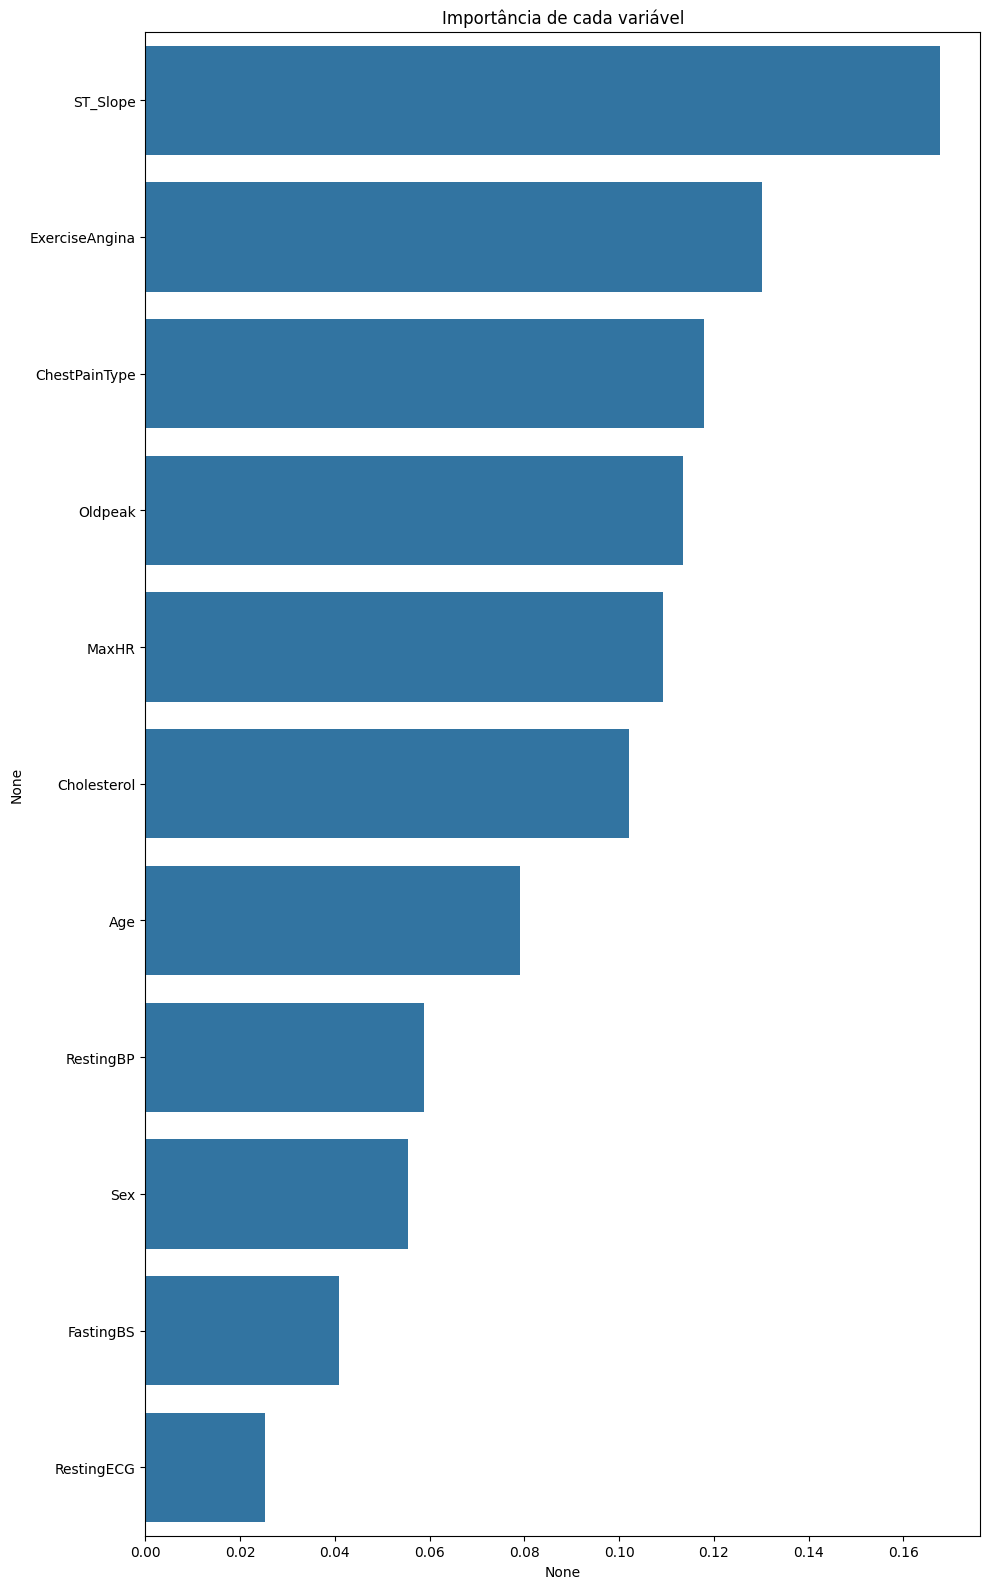

In [65]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 16.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [66]:
# Visualizando o percentual de importancia de cada variável
importances.sort_values(ascending = False)

ST_Slope         0.17
ExerciseAngina   0.13
ChestPainType    0.12
Oldpeak          0.11
MaxHR            0.11
Cholesterol      0.10
Age              0.08
RestingBP        0.06
Sex              0.06
FastingBS        0.04
RestingECG       0.03
dtype: float64

In [67]:
y_pred = clf.predict(x_teste_normalizados)
print(accuracy_score(y_teste, y_pred)* 100)

86.22950819672131


In [68]:
# Criando a variável de previsões do algoritmo para ver se ele acertou ou não
y_pred = clf.predict(x_teste_normalizados)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [69]:
# Acessamos a base de dados de teste para ver os resultados
y_teste

804     1
855     1
620     0
361     1
849     0
224     0
593     1
230     0
9       0
993     0
788     0
8       1
510     0
974     0
624     1
91      0
229     0
108     0
556     0
300     1
604     0
93      1
784     1
11      1
618     0
102     1
160     1
654     0
38      0
727     1
118     0
764     0
666     0
949     0
911     1
123     1
52      0
752     1
854     0
931     0
244     1
282     0
646     0
613     0
659     1
191     0
619     0
853     0
268     1
408     1
214     1
465     0
955     0
131     1
57      1
192     0
925     0
14      0
429     1
286     0
327     1
568     1
412     1
130     0
416     1
938     0
17      0
607     1
700     0
721     0
187     1
1014    0
355     1
937     0
946     0
862     0
454     1
492     1
50      1
999     0
119     1
294     1
200     0
341     1
409     1
430     1
617     1
458     1
149     1
466     1
70      1
18      1
947     0
757     1
547     1
400     1
393     1
928     0
261     0
201     0


In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_teste, y_pred))

[[141  26]
 [ 16 122]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       167
           1       0.82      0.88      0.85       138

    accuracy                           0.86       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305



In [72]:
cm = confusion_matrix(y_teste, y_pred)
print(cm)

[[141  26]
 [ 16 122]]


In [73]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Sim","Não"])

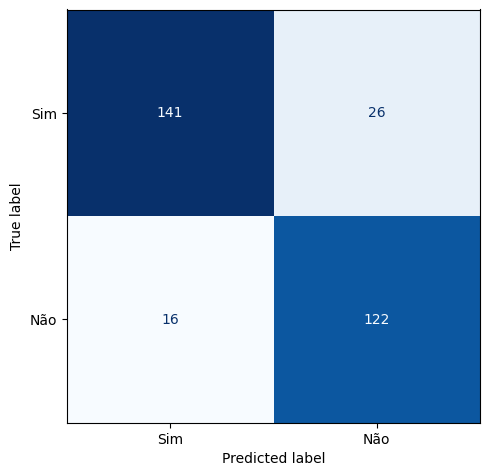

In [74]:
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True
cm_disp.plot(include_values=True,
             cmap='Blues',
             colorbar=None)